In [41]:
%matplotlib inline                                    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import itertools
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.optimize import leastsq
import matplotlib.gridspec as gridspec
from dateutil.parser import parse

In [77]:
df = pd.read_csv('../Compa_cote_vr_2017_MPL.csv', sep=';')

In [78]:
print(df.head())

                 VIN  Cote_D     VR  Age     KM   Marque     Modele  \
0  vf30arhe8ds049762   15269  13411   35  64000  PEUGEOT       5008   
1  vf30eahrmfs239298   23929  20820    6  22300  PEUGEOT       5008   
2  vf30arhe8cs234266   14481  12706   40  70500  PEUGEOT       5008   
3  vf3xuahz8cz049873       0      0   41  94300  PEUGEOT  EXPERT VU   
4  vf3xuahz8cz057181       0      0   39  77100  PEUGEOT  EXPERT VU   

   Carburant  Carrosserie  Litre    ...      Jour   KMM   KM_VR  \
0          2           13    2.0    ...        25  1830   85924   
1          2           13    2.0    ...        21  3720   67012   
2          2           13    2.0    ...        20  1760   93459   
3          2           22    2.0    ...        30  2300  121852   
4          2           22    2.0    ...         3  1980  100875   

            data_month     Date_VR Sur_KM  Age_months  Age_VR  Cote_Today_C  \
0  2016-04-01 00:00:00  2017-04-01      0        36.0    48.0       17370.0   
1  2016-04-0

In [79]:
df = df[df.Cote_D>0]
delta_cote = df.Cote_D - df.Cote_Today_C
print(delta_cote[:5])
delta_cote.mean(0)

0    -2101.0
1      370.0
2    -2032.0
10    -104.0
16     -40.0
dtype: float64


-222.83214285714286

In [80]:
delta_vr = df.VR - df.Cote_VR_C
print(delta_vr[:5])
delta_vr.mean(0)

0    -1608.0
1     2125.0
2    -1433.0
10    -372.0
16    1157.0
dtype: float64


211.21938775510205

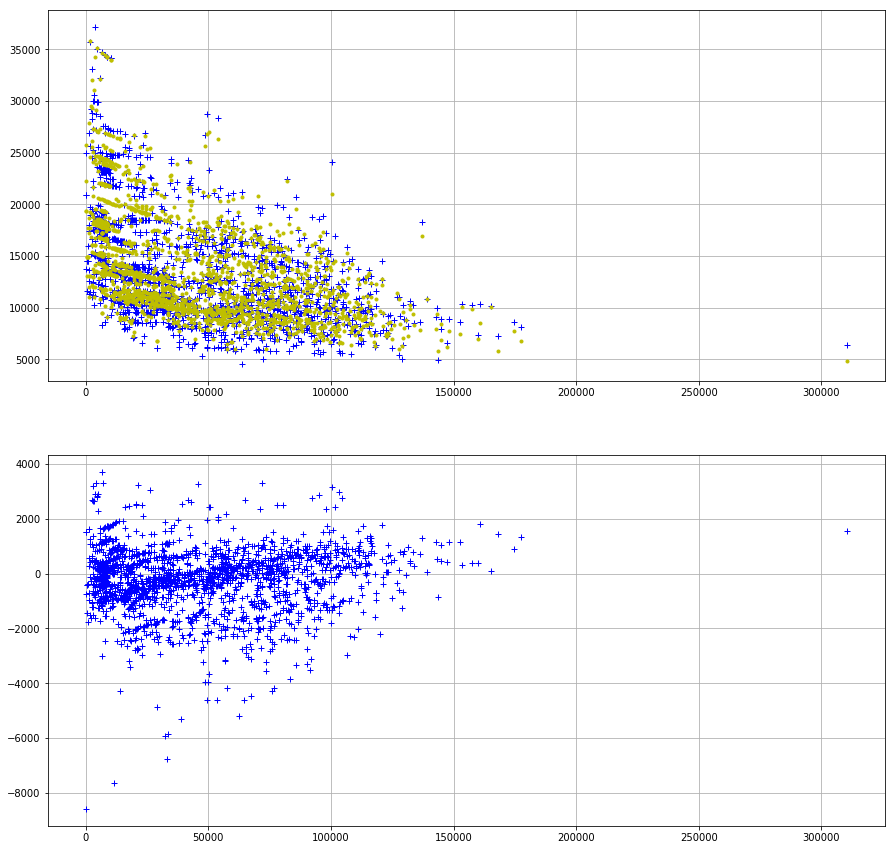

In [81]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(211)
plt.plot(df.KM, df.Cote_D, 'b+')
plt.plot(df.KM, df.Cote_Today_C, 'y.')
plt.grid(True)
ax2 = plt.subplot(212)
plt.plot(df.KM, df.Cote_D-df.Cote_Today_C, 'b+')
plt.grid(True)



In [82]:
devalo_cote_D = 100-100*(df.VR / df.Cote_D) 
devalo_cote_C = 100-100*(df.Cote_VR_C / df.Cote_Today_C)  

In [83]:
devalo_cote_D[:5]

0     12.168446
1     12.992603
2     12.257441
10    16.013856
16    12.965402
dtype: float64

In [84]:
devalo_cote_C[:5]

0     13.534830
1     20.646038
2     14.376552
10    13.508756
16    21.205836
dtype: float64

In [85]:
devalo_cote_C.max()

51.189737223256778

In [86]:
devalo_cote_C.min()

3.7614092203941567

In [87]:
devalo_cote_C.mean()

15.587852255870942

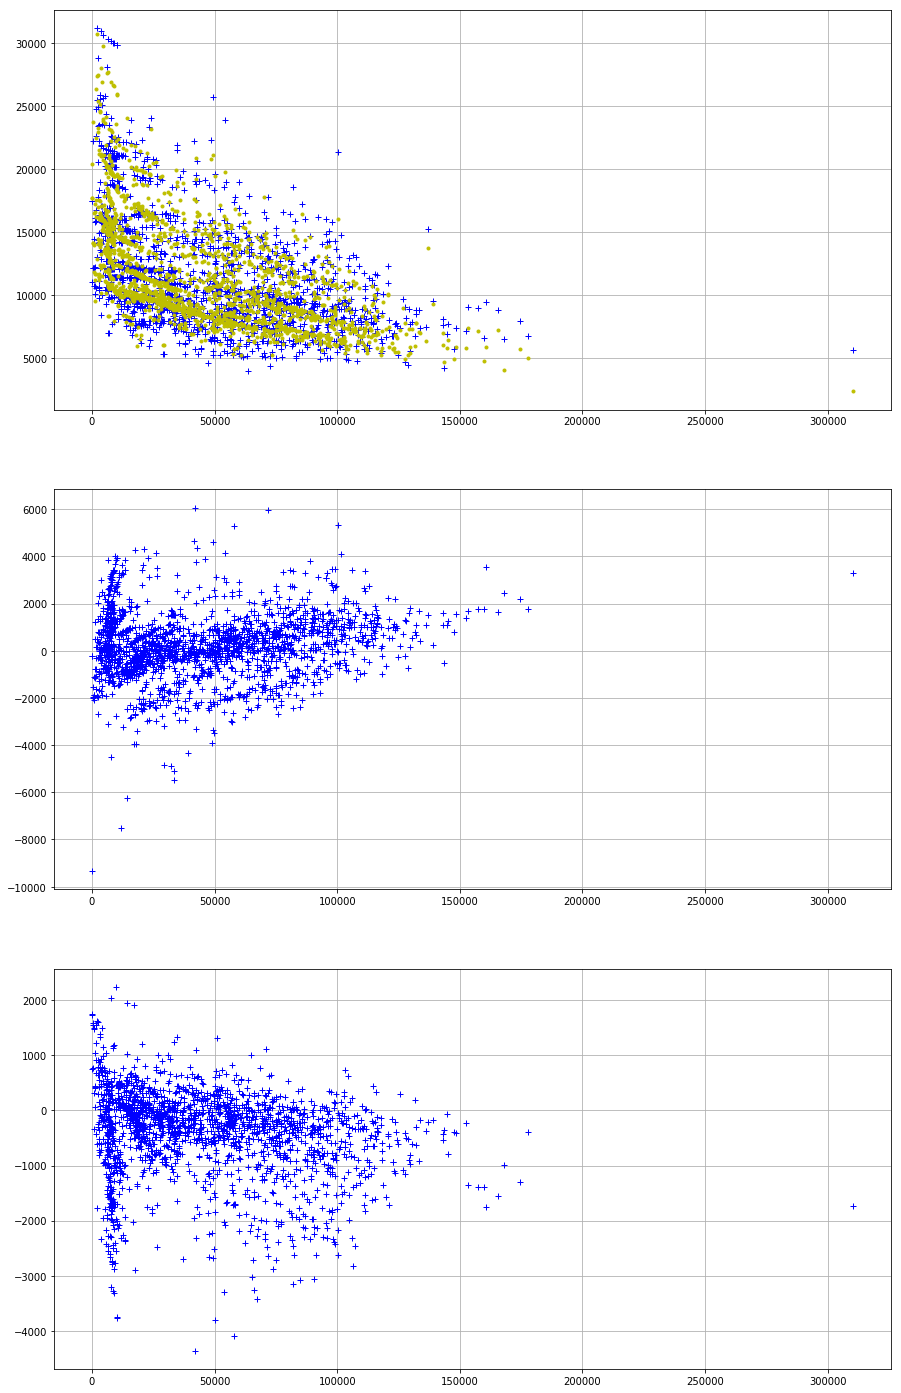

In [95]:
fig = plt.figure(figsize=(15,25))
ax2 = plt.subplot(311)
plt.plot(df.KM, df.VR, 'b+')
plt.plot(df.KM, df.Cote_VR_C, 'y.')
plt.grid(True)
ax2 = plt.subplot(312)
plt.plot(df.KM, df.VR-df.Cote_VR_C, 'b+')
plt.grid(True)
ax3 = plt.subplot(313)
plt.plot(df.KM, (df.Cote_D-df.Cote_Today_C)-(df.VR-df.Cote_VR_C), 'b+')
plt.grid(True)



In [91]:
len(df[df.Cote_D==0])

0